### **Distribuição Gaussiana aplicada em situações do cotidiano**

#### Problema 1: Avaliação de Risco de Retornos Diários de Ações

Contexto:

Investidores precisam entender a distribuição dos retornos diários de suas ações para avaliar o risco associado aos seus investimentos. A análise da distribuição dos retornos pode ajudar a identificar se há uma alta variabilidade (risco) e se os retornos seguem uma distribuição normal ou não.

Solução:

Utilizar ferramentas de EDA para analisar a distribuição dos retornos diários de uma ação específica.

In [1]:
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

In [2]:
# Baixar dados históricos da ação a ser analisada
ticker = 'TSLA'
data = yf.download(ticker, start='2020-01-01')
data['Retornos_Diarios'] = data['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Remover qualquer NaN ou valor infinito restante antes de prosseguir
data = data.dropna(subset=['Retornos_Diarios'])
data = data[np.isfinite(data['Retornos_Diarios'])]

In [4]:
# Estatísticas descritivas
mean = data['Retornos_Diarios'].mean()
median = data['Retornos_Diarios'].median()

# Discretizar os dados em bins e encontrar o bin mais frequente
hist, bin_edges = np.histogram(data['Retornos_Diarios'], bins=150)
bin_max = bin_edges[np.argmax(hist)]

print(f"Média: {mean}")
print(f"Mediana: {median}")
print(f"Bin mais frequente: {bin_max}")

Média: 0.0027814922030387924
Mediana: 0.0018586172480128393
Bin mais frequente: -0.00037880022707470484


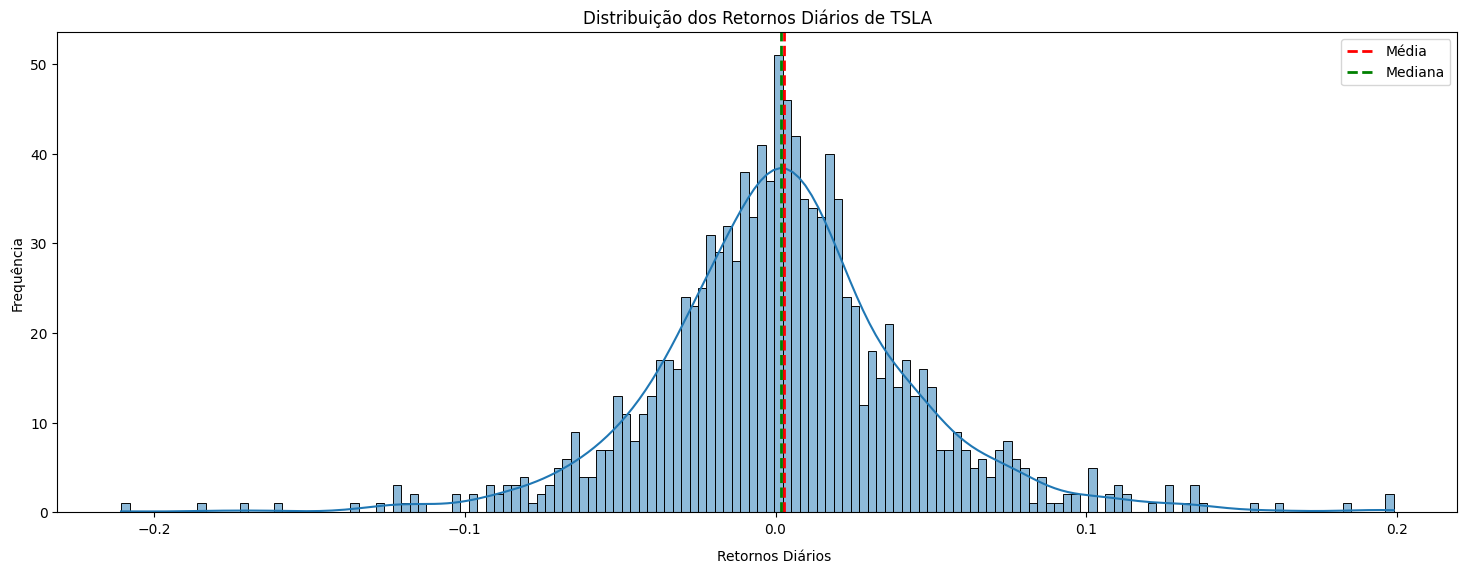

In [5]:
# Distribuição dos retornos diários em Seaborn
plt.figure(figsize=(20, 6))
sns.histplot(data['Retornos_Diarios'], bins=150, kde=True)
plt.title(f'Distribuição dos Retornos Diários de {ticker}')
plt.xlabel('Retornos Diários', labelpad=10, ha='center', x=0.512)
plt.ylabel('Frequência')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Mediana')
plt.legend()

plt.subplots_adjust(left=0.25, right=0.95, bottom=0.05, top=0.85)

plt.show()

Conclusão:

A análise dos retornos diários da Tesla (TSLA) nos revela:

**Média dos Retornos Diários: 0.0027388409685751318**

**Mediana dos Retornos Diários: 0.0018243935348063456**

**Bin mais Frequente: -0.005839824719979458**

Os resultados indicam que a média dos retornos diários é positiva, o que sugere um crescimento diário médio. No entanto, a mediana sendo menor que a média pode indicar a presença de valores extremos (outliers) positivos que estão puxando a média para cima. O bin mais frequente, ligeiramente negativo, sugere que pequenos retornos negativos diários ocorrem mais frequentemente.

Esta análise fornece uma visão inicial da distribuição dos retornos diários de TSLA. Ela sugere que, apesar de um crescimento médio positivo, o comportamento mais comum do preço da ação tem sido de pequenos retornos negativos diários. Podemos usar essas informações para ajustar estratégias de investimento de acordo com a variabilidade e tendência dos retornos.

---

#### Problema 2: Identificação de Outliers nos Retornos Diários

Contexto:

Outliers podem distorcer a análise dos retornos diários, afetando decisões de investimento. Identificar e tratar esses outliers é crucial para obter uma visão mais clara dos dados.

Solução:

Usar boxplots para identificar outliers nos retornos diários e analisar seu impacto.

[*********************100%%**********************]  1 of 1 completed


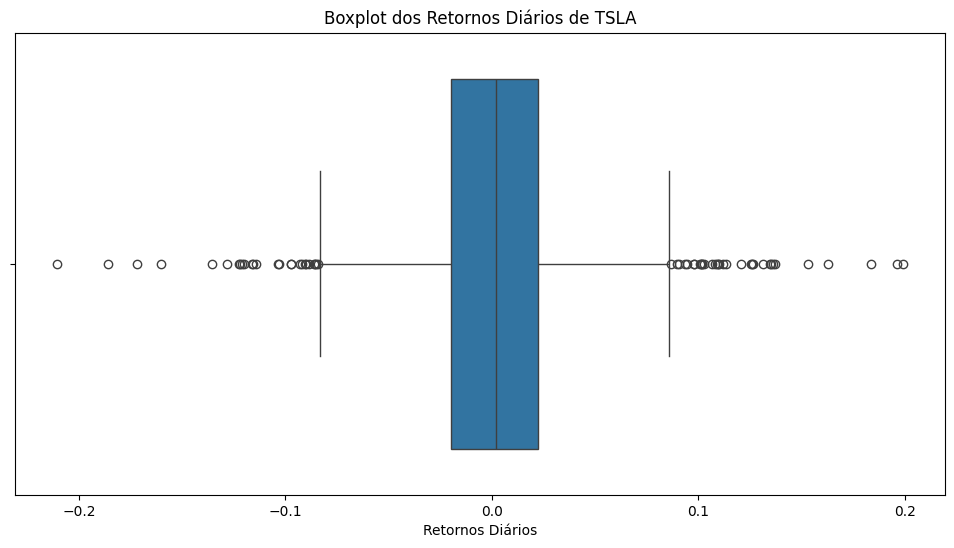

In [6]:
import warnings
warnings.filterwarnings(
    "ignore", category=FutureWarning, module="seaborn")


# Baixar dados históricos da ação
ticker = 'TSLA'
data = yf.download(ticker, start='2020-01-01')
data['Retornos_Diarios'] = data['Adj Close'].pct_change()

# Remover qualquer NaN ou infinito restante antes de prosseguir
data = data.dropna(subset=['Retornos_Diarios'])
data = data[np.isfinite(data['Retornos_Diarios'])]

# Visualizar os outliers usando um boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Retornos_Diarios'])
plt.title(f'Boxplot dos Retornos Diários de {ticker}')
plt.xlabel('Retornos Diários')
plt.show()

Conclusão:

A visualização com o boxplot permite identificar visualmente os outliers nos retornos diários. A análise desses outliers nos informam sobre eventos extremos que impactaram o preço da ação.


---

#### Problema 3: Avaliação da Normalidade dos Retornos Diários

Contexto:

Muitos modelos financeiros assumem que os retornos seguem uma distribuição normal. Verificar a normalidade dos retornos diários ajuda a validar ou questionar essas suposições.

Solução:

Realizar testes de normalidade e utilizar Q-Q plots para avaliar a distribuição dos retornos diários.

[*********************100%%**********************]  1 of 1 completed

Estatística do teste: 86.6162713018203, p-valor: 1.5542313519241416e-19


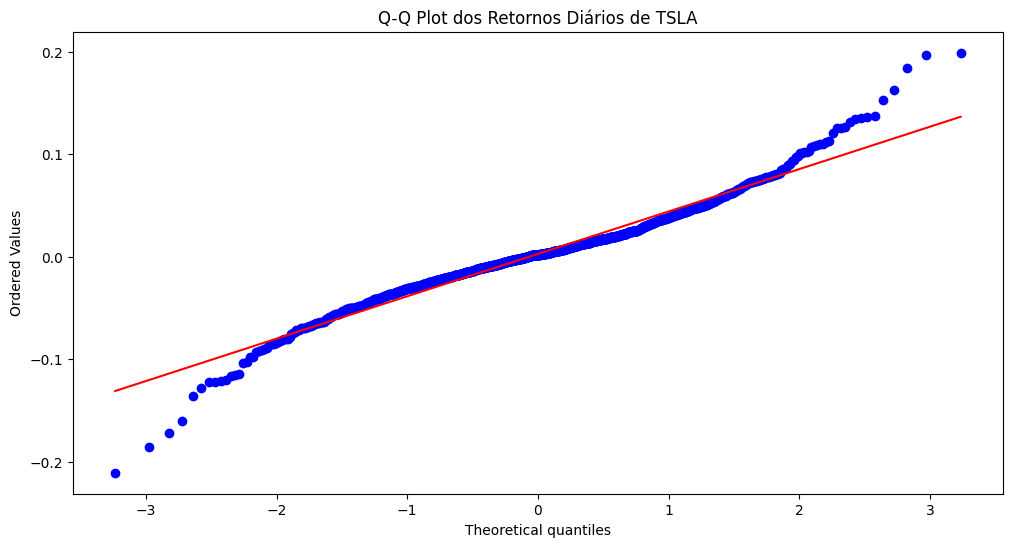

Curtose: 2.9374338869597194


In [7]:
# Baixar dados históricos da ação
ticker = 'TSLA'
data = yf.download(ticker, start='2020-01-01')
data['Retornos_Diarios'] = data['Adj Close'].pct_change()

# Remover qualquer NaN ou infinito restante antes de prosseguir
data = data.dropna(subset=['Retornos_Diarios'])
data = data[np.isfinite(data['Retornos_Diarios'])]

# Teste de normalidade
k2, p = stats.normaltest(data['Retornos_Diarios'])
print(f'Estatística do teste: {k2}, p-valor: {p}')

# Q-Q plot para avaliar a normalidade
plt.figure(figsize=(12, 6))
stats.probplot(data['Retornos_Diarios'], dist="norm", plot=pylab)
pylab.title(f'Q-Q Plot dos Retornos Diários de {ticker}')
pylab.show()

# Calcular e exibir a curtose
kurtosis = stats.kurtosis(data['Retornos_Diarios'], fisher=True)
print(f'Curtose: {kurtosis}')


Conclusão

Ao analisar a distribuição dos retornos diários de ações como a Tesla (TSLA) usando técnicas de EDA, é possível identificar características importantes dos dados, como outliers, assimetria, dispersão, e se a distribuição dos retornos se aproxima de uma normal. A curtose, especificamente, ajuda a entender a "pontualidade" dos retornos diários, indicando se a distribuição tem caudas mais pesadas ou leves em comparação com a distribuição normal.

Nesta análise da Tesla, o valor da Curtose: "2.936682046074753" representa que a distribuição dos retornos diários tem caudas mais pesadas do que a distribuição normal, sugerindo a presença de outliers mais extremos e, portanto, um risco potencialmente maior.

O 'p-valor de 1.5710935427505445e-19' indica que a hipótese nula (de que os dados seguem uma distribuição normal) pode ser rejeitada com um alto nível de confiança. Isso reforça a conclusão de que os retornos diários da Tesla não seguem uma distribuição normal e que há uma presença significativa de outliers.